# Table of Contents
<a id = 'table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data Cleaning](#data_clean)
3. [Data Preparation](#data_prep)
4. [Data Preparation](#data_prep)
5. [Benchmark Model](#section5)<br>
    5.1 [Train-Test Split](#section5.1)<br>
    5.2 [Fit model to data](#section5.2)<br>
    5.3 [Model Evalution](#section5.3)<br>
    5.4 [Fix Problems](#section5.4)<br>
6. [Feature Engineering](#FeatureEngineering)
7. [Model Training](#modelTraining)

<a id=section5.> </a>
[back to top](#table-of-contents)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os

# 1. Import dataset <a id ='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
# dataset is in parquet format and can be read using pyarrow
taxi_jan24_df = pq.read_table('yellow_tripdata_2024-01.parquet').to_pandas()
df = pd.concat([taxi_jan24_df]) #if more dataframes from other months is to be added, add them here 

In [4]:
#printing the dataset and the shape of the dataset 
df.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.50,0.5,6.90,0.00,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.00,0.5,10.00,0.00,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.50,0.5,0.00,0.00,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.00,0.5,0.00,0.00,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.00,0.5,0.00,0.00,1.0,8.00,2.5,0.00


In [5]:
df.shape

(2964624, 19)

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [7]:
#dropping the columns that are not needed
df = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
         'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,148,141,1,41.50
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,138,181,1,64.95
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,246,231,2,30.40
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,161,261,2,36.00
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,113,113,2,8.00


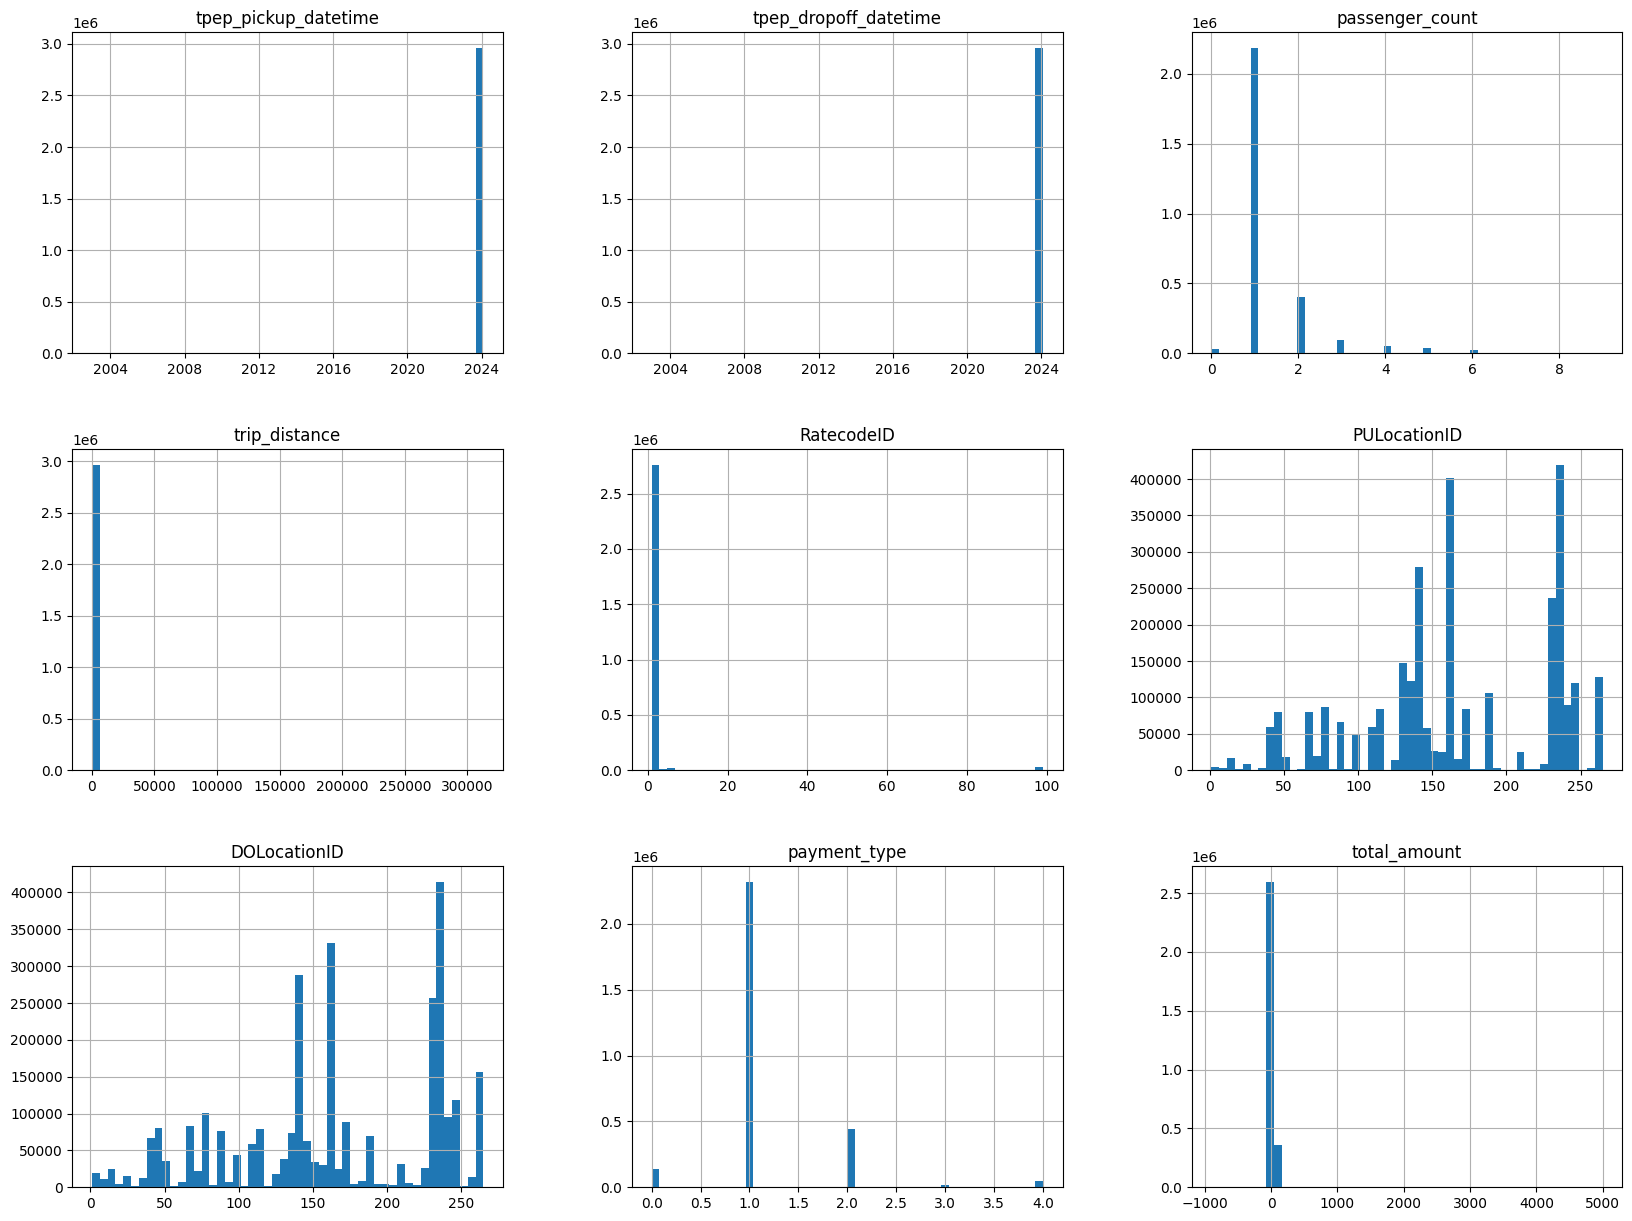

In [8]:
#plot a histogram for each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

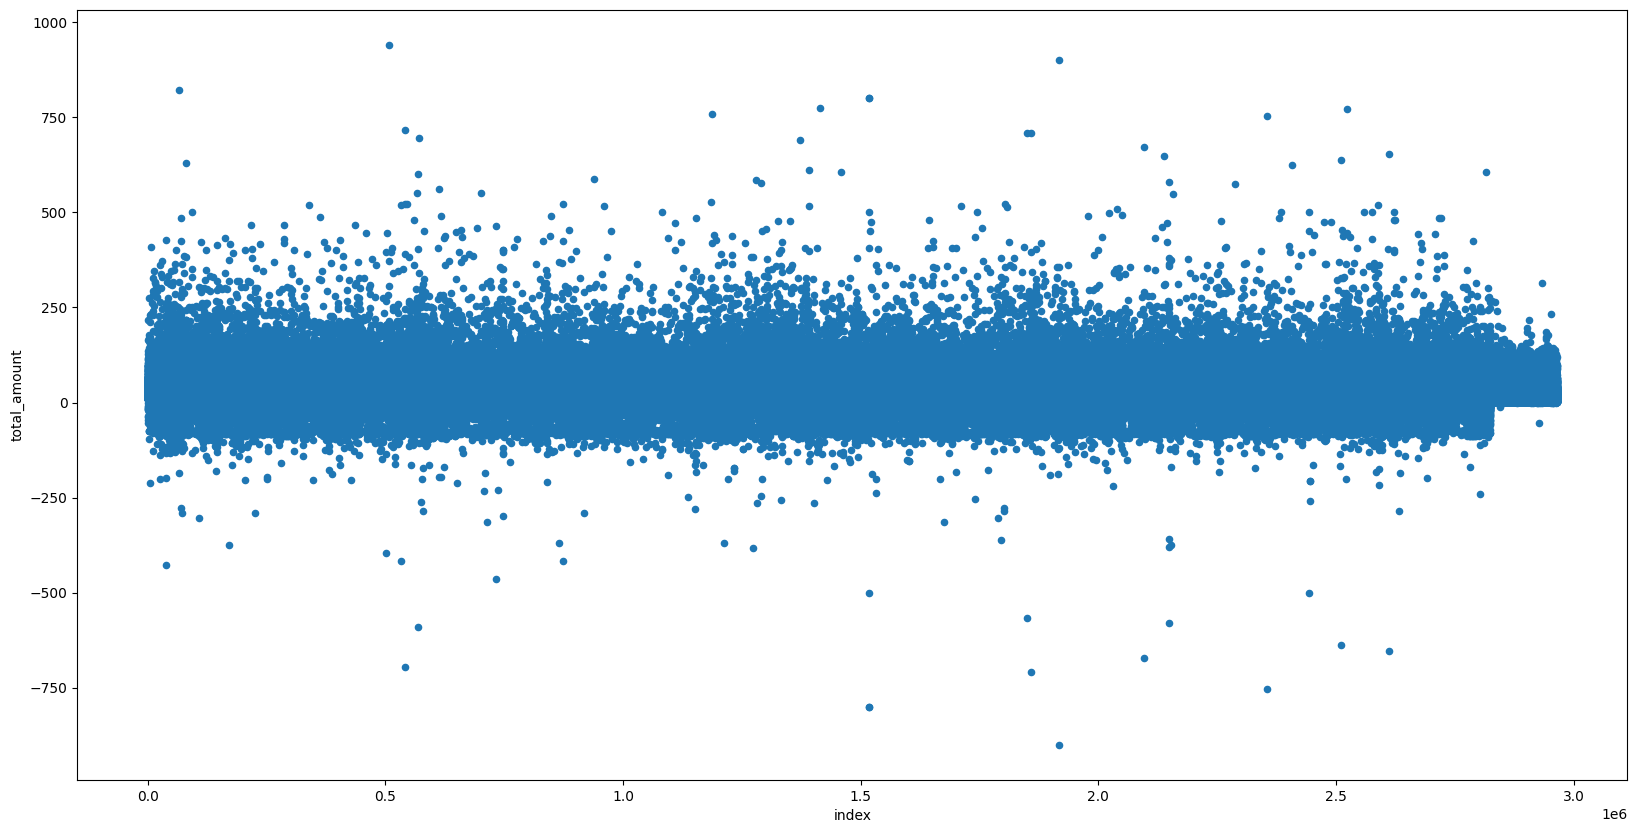

In [10]:
#plot a graph for total_amount column
df[df['total_amount']<1000].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))


As there are many outliers, like negative values and very high total amounts, we will not clean the data for this

(35504, 9)


<Axes: xlabel='index', ylabel='total_amount'>

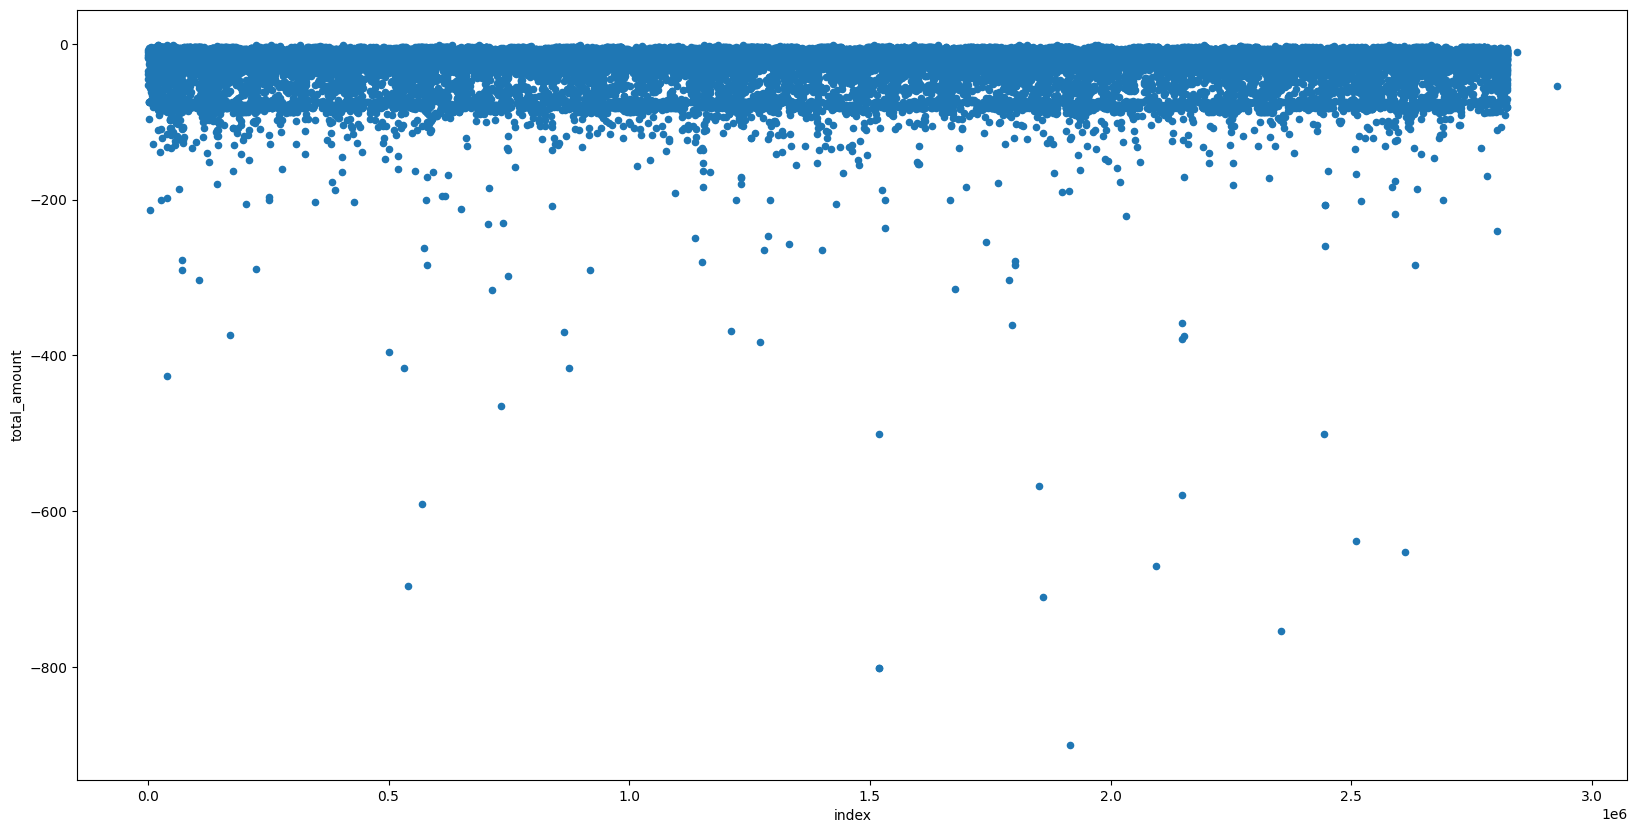

In [11]:
print(df[df['total_amount'] < 0].shape)
df[df['total_amount']<0].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))

In [12]:
#check the payment_type of the negative total_amount
df[df['total_amount'] < 0]['payment_type'].value_counts()

#df[df['total_amount'] < 0].head(20)

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [13]:
#also check for values that are zero
print(df[df['total_amount']==0].shape)
df[df['total_amount']==0].head(20)

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0
66332,2024-01-01 21:33:28,2024-01-01 21:33:46,1.0,0.0,1.0,132,132,4,0.0
73242,2024-01-02 06:48:53,2024-01-02 06:49:13,1.0,0.0,1.0,264,264,3,0.0
80414,2024-01-02 08:11:15,2024-01-02 08:12:10,1.0,0.0,1.0,193,193,2,0.0
85942,2024-01-02 10:30:09,2024-01-02 10:34:13,1.0,0.0,5.0,138,138,4,0.0
93381,2024-01-02 12:04:15,2024-01-02 12:31:59,1.0,5.5,1.0,236,90,3,0.0


trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64


<Axes: >

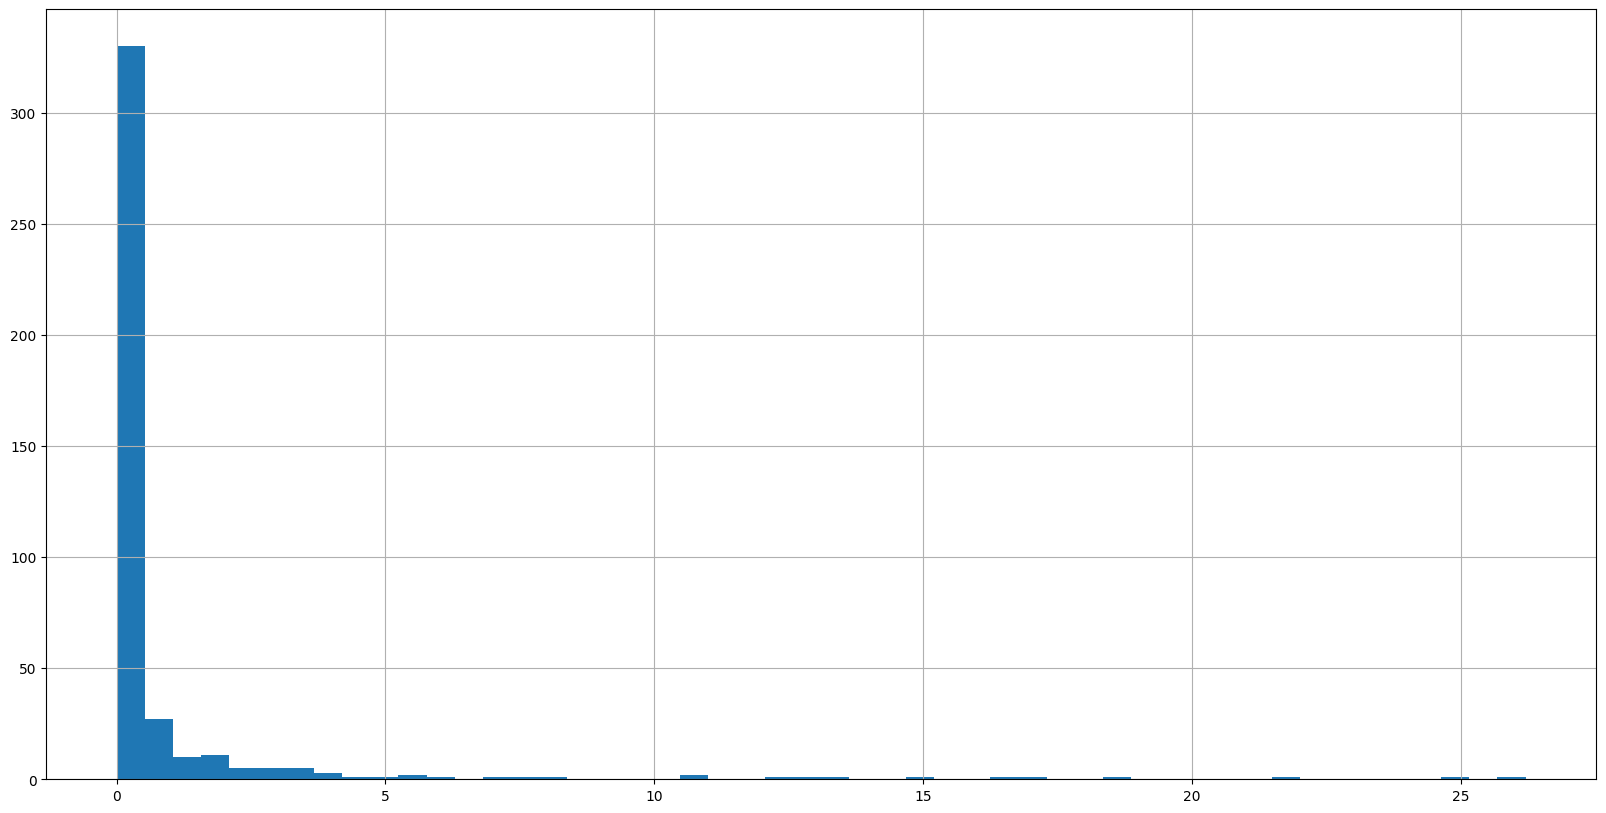

In [14]:
#check the trip_distance of the zero total_amount
print(df[df['total_amount']==0]['trip_distance'].value_counts())
df[df['total_amount']==0]['trip_distance'].hist(bins=50, figsize=(20,10))

<Axes: xlabel='index', ylabel='trip_distance'>

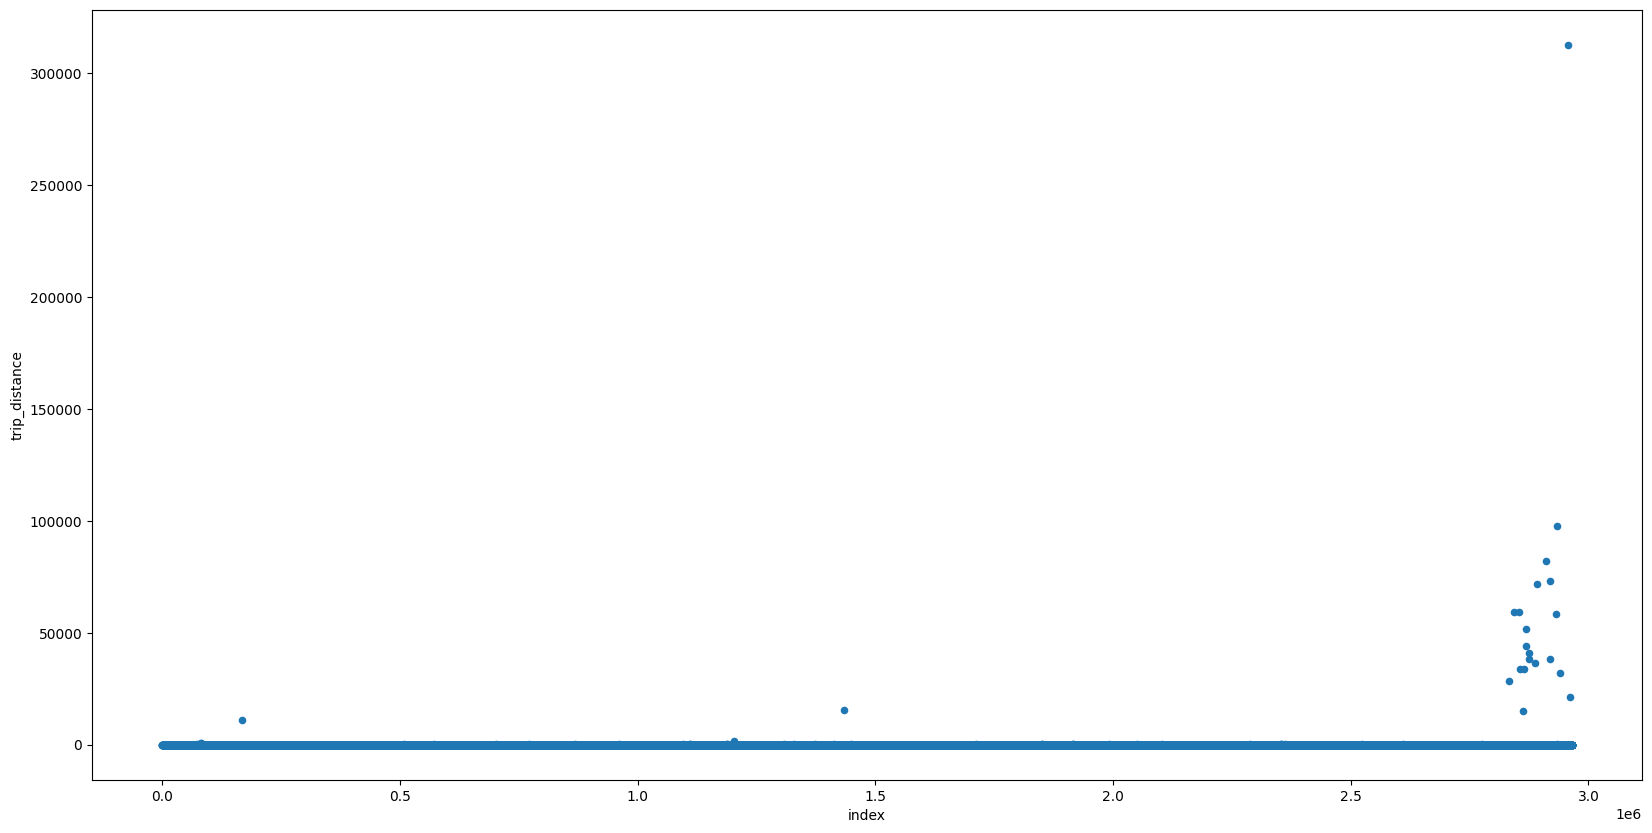

In [15]:
df.reset_index().plot(kind='scatter', x='index', y='trip_distance', figsize=(20,10))

<bound method DataFrame.value_counts of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1850351  2024-01-21 18:08:49   2024-01-21 20:15:48              1.0   
1916204  2024-01-22 16:40:43   2024-01-22 19:11:20              1.0   
2354216  2024-01-26 23:59:09   2024-01-27 02:45:39              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1850351         110.46         4.0           132           265             2   
1916204         157.25         5.0           265           265             2   
2354216         120.76         4.0           143           265             4   

         total_amount  
1850351       -567.72  
1916204       -900.00  
2354216       -753.74  >


<Axes: xlabel='index', ylabel='trip_distance'>

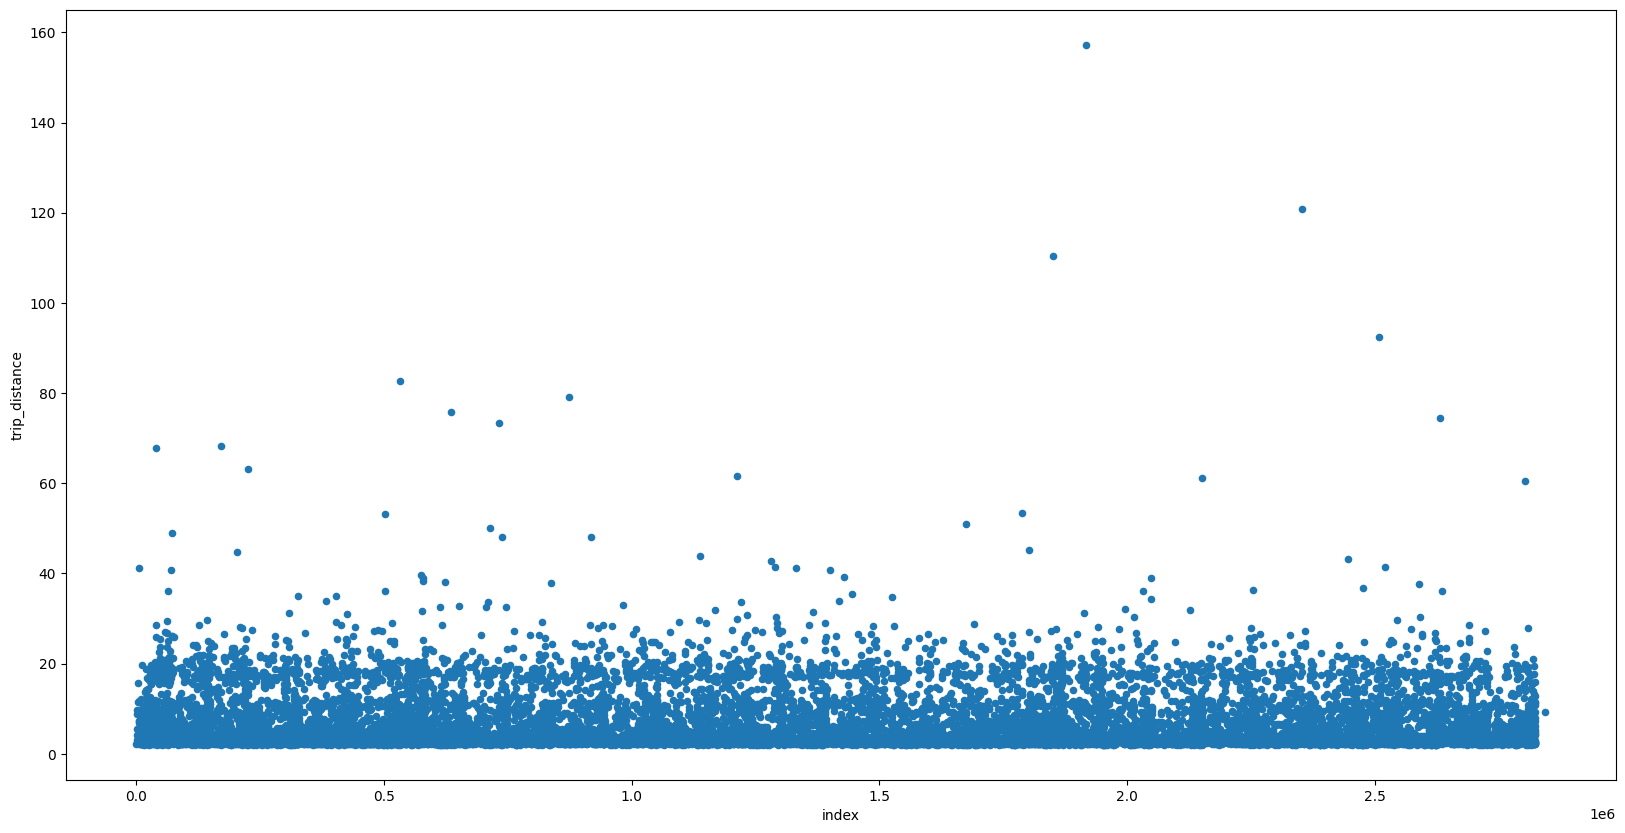

In [16]:
print(df[(df['total_amount'] < 0) & (df['trip_distance'] > 100)].value_counts)
df[(df['total_amount']<0)&(df['trip_distance']>2)].reset_index().plot(kind='scatter', x='index', y='trip_distance', figsize=(20,10))

## 2. Data Cleaning <a id = data_clean></a>
[Back to top](#table-of-contents)

In [17]:
#clean the data to remove the negative values and zero values in total_amount and total_amount to stay less than 200
df = df[(df['total_amount'] >= 0) & (df['total_amount'] < 200)]

(2927107, 9)


<Axes: xlabel='index', ylabel='total_amount'>

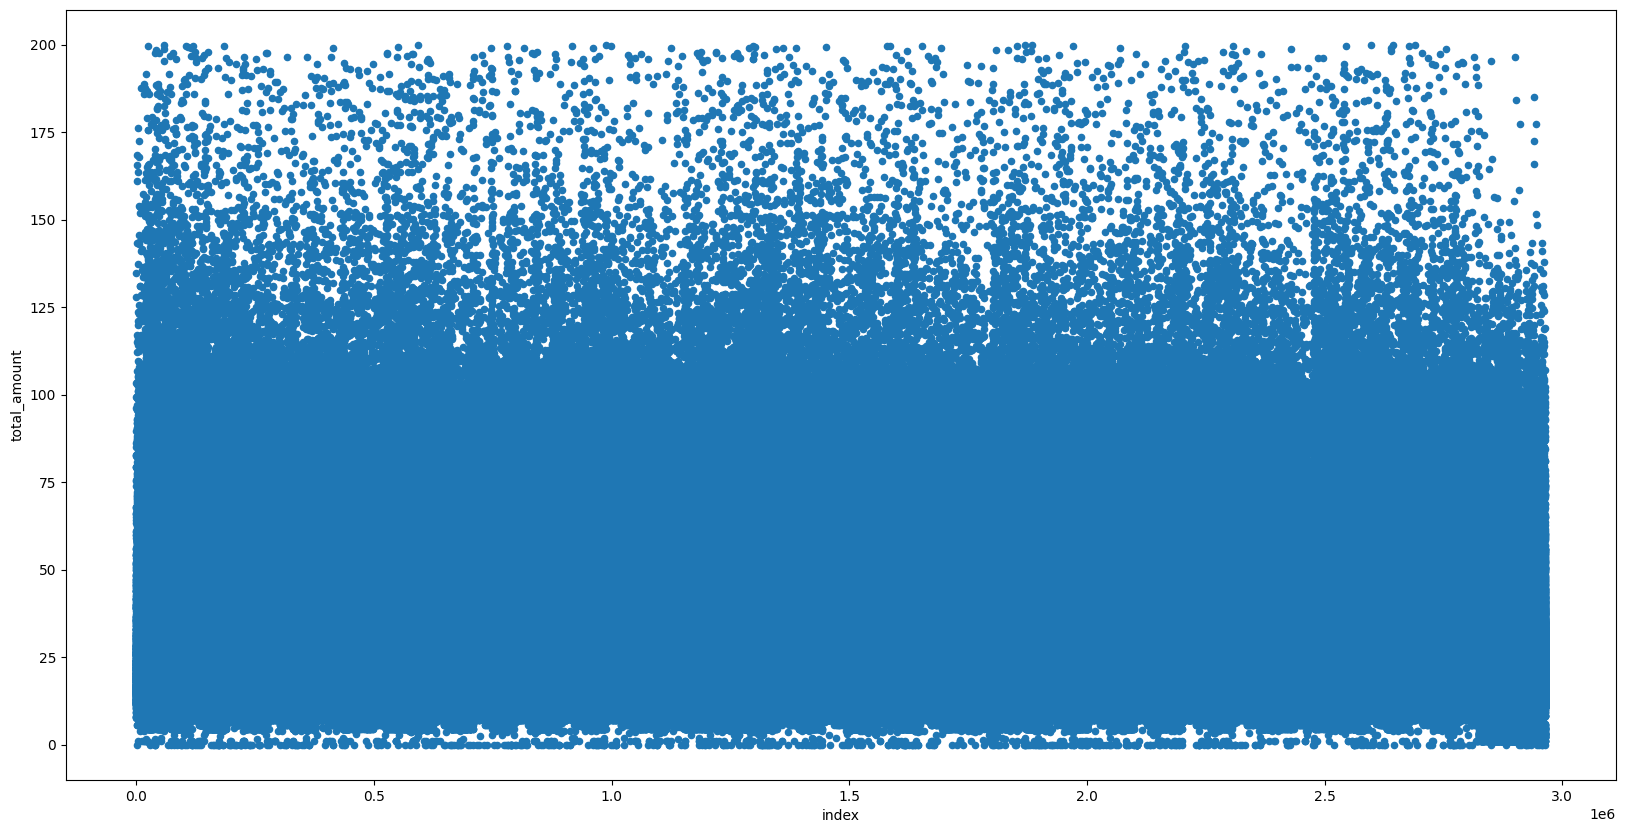

In [18]:
print(df.shape)
df.reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))

In [19]:
#all the columns that have missing values
df.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140153
trip_distance                 0
RatecodeID               140153
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

## 3. Data Preparation <a id = 'data_prep'></a>
[Back to top](#table-of-contents)

In [20]:
df_prepared = df.copy()

In [21]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [22]:
#change the data types of tpep_pickup_datetime and tpep_dropoff_datetime to datetime
df_prepared['tpep_pickup_datetime'] = pd.to_datetime(df_prepared['tpep_pickup_datetime'])
df_prepared['tpep_dropoff_datetime'] = pd.to_datetime(df_prepared['tpep_dropoff_datetime'])

In [23]:
#change the data types of RatecodeID, PULocationID, DOLocationID, and payment_type to category
df_prepared['RatecodeID'] = df_prepared['RatecodeID'].astype('str')
df_prepared['PULocationID'] = df_prepared['PULocationID'].astype('str')
df_prepared['DOLocationID'] = df_prepared['DOLocationID'].astype('str')
df_prepared['payment_type'] = df_prepared['payment_type'].astype('str')

# fill NaN values in passenger_count with 0 before converting to int
df_prepared['passenger_count'] = df_prepared['passenger_count'].fillna(0).astype('int')

In [24]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [25]:
#create a new features called tansaction_date, transaction_month, transaction_day and transaction_hour from the tpep_pickup_datetime
df_prepared['transaction_date'] = df_prepared['tpep_pickup_datetime'].dt.date
df_prepared['transaction_year'] = df_prepared['tpep_pickup_datetime'].dt.year
df_prepared['transaction_month'] = df_prepared['tpep_pickup_datetime'].dt.month
df_prepared['transaction_day'] = df_prepared['tpep_pickup_datetime'].dt.day
df_prepared['transaction_hour'] = df_prepared['tpep_pickup_datetime'].dt.hour


In [26]:
df_prepared.head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1,4.70,1.0,148,141,1,41.50,2024-01-01,2024,1,1,0
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2,10.82,1.0,138,181,1,64.95,2024-01-01,2024,1,1,0
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0,3.00,1.0,246,231,2,30.40,2024-01-01,2024,1,1,0
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1,5.44,1.0,161,261,2,36.00,2024-01-01,2024,1,1,0
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1,0.04,1.0,113,113,2,8.00,2024-01-01,2024,1,1,0


In [27]:
print(df_prepared['transaction_year'].value_counts())
print(df_prepared['transaction_month'].value_counts()) 

transaction_year
2024    2927093
2023         10
2009          3
2002          1
Name: count, dtype: int64
transaction_month
1     2927093
12         11
2           3
Name: count, dtype: int64


In [28]:
#we only want the data for the year 2024 and month 1
df_prepared = df_prepared[df_prepared['transaction_year'] == 2024]
df_prepared = df_prepared[df_prepared['transaction_month'] == 1]

In [29]:
df_prepared.head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1,4.70,1.0,148,141,1,41.50,2024-01-01,2024,1,1,0
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2,10.82,1.0,138,181,1,64.95,2024-01-01,2024,1,1,0
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0,3.00,1.0,246,231,2,30.40,2024-01-01,2024,1,1,0
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1,5.44,1.0,161,261,2,36.00,2024-01-01,2024,1,1,0
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1,0.04,1.0,113,113,2,8.00,2024-01-01,2024,1,1,0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>]], dtype=object)

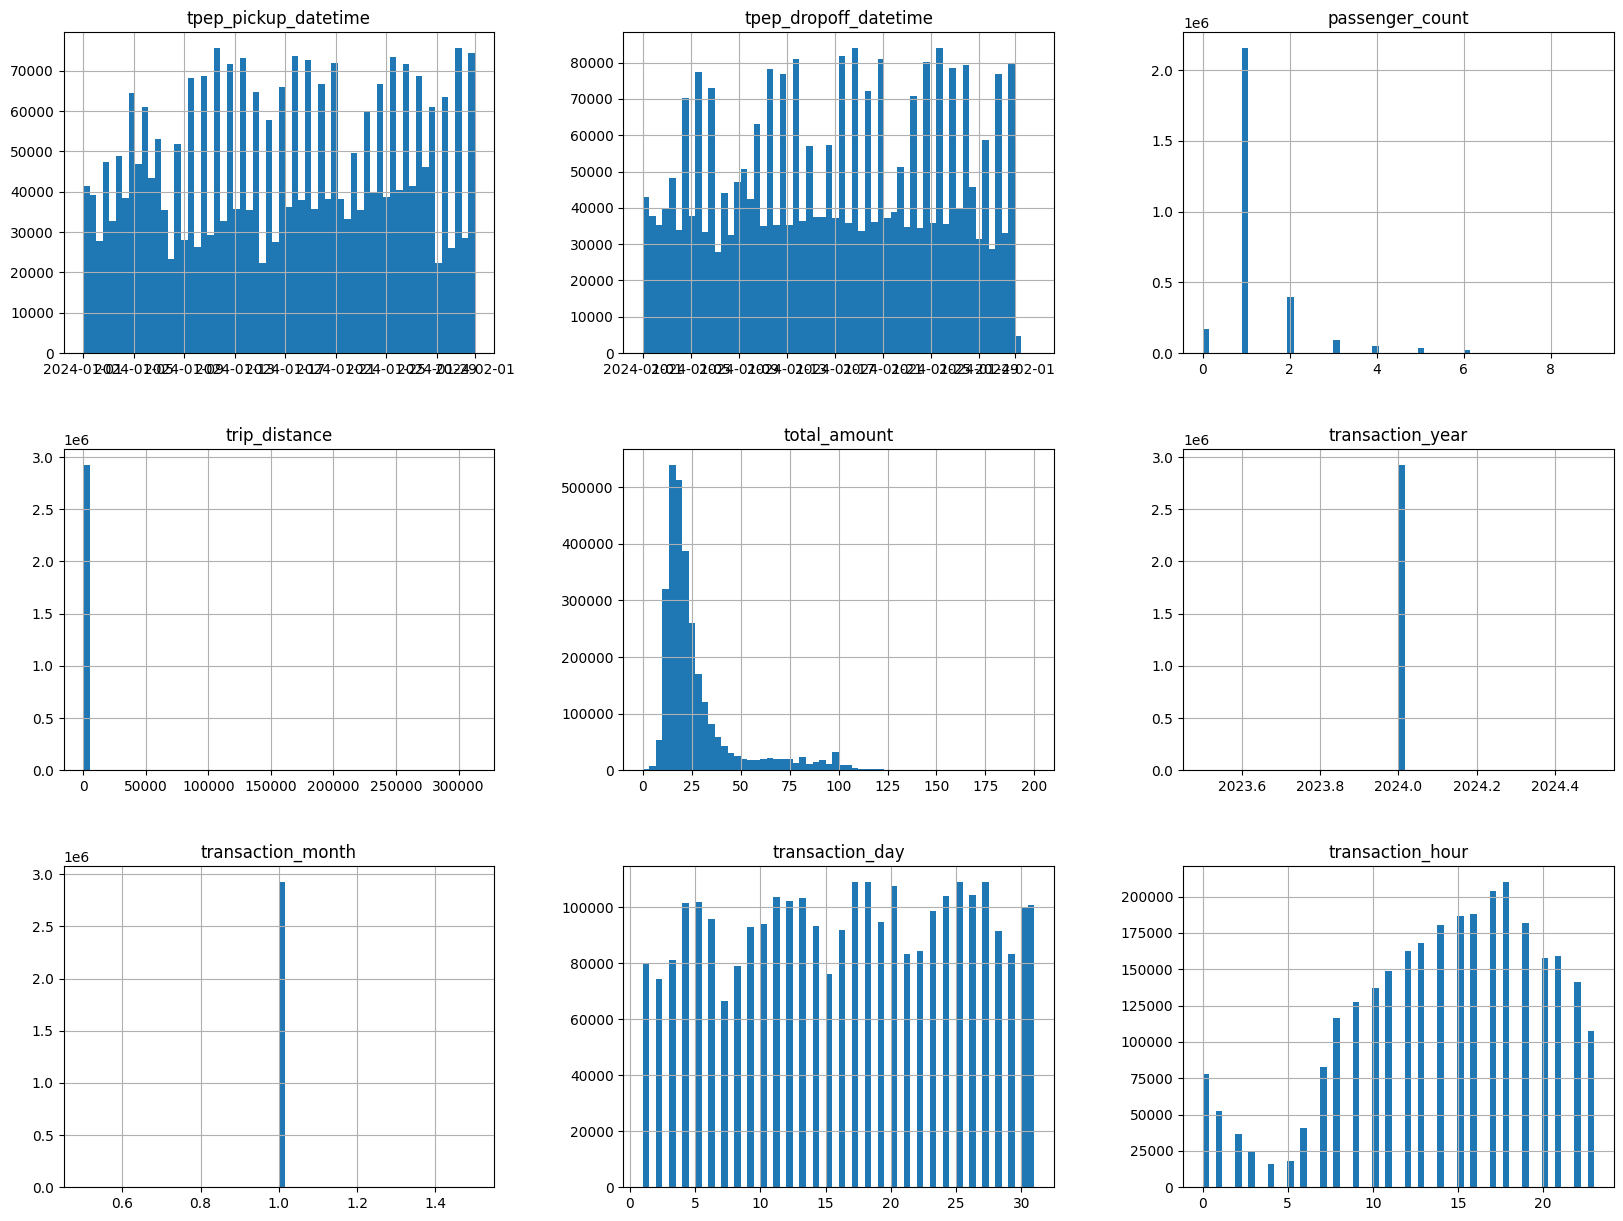

In [30]:
df_prepared.hist(figsize=(20,15), bins=60)

In [33]:
df_prepared.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'transaction_date', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour'],
      dtype='object')

**Purpose of this EDA**<br> We are trying to answer 2 questions:<br>
- Predict average money riders spend in certain regions of New York in a given hour of a day of a month
- Also

Noting down categorical and numerical columns<br> Dropping the RatecodeID and payment type as they are not needed anymore<br>
Also dropping the pickup and dropoff datetime as i have extracted the date, day,month and hour as seperate features 

In [ ]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns 

In [37]:
#coping the df_prepared dataframe to df_main
df_main = df_prepared[all_needed_columns]
print(df_main.shape)
df_main.head()

(2927090, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


Aggregate data points

In [42]:
#for a specific PULocationID, transation_date and transation_hour we want to know the average trip_distance and total_amount.
#we will also want to know the number of transactions for that specific observation
df_grouped_by_region = df_main.groupby(categorical_columns).mean().reset_index()
df_grouped_by_region['number_of_transactions'] = df_main.groupby(categorical_columns).count().reset_index()['trip_distance']
print(df_grouped_by_region.shape)
df_grouped_by_region.head()

(77432, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


array([[<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'number_of_transactions'}>]], dtype=object)

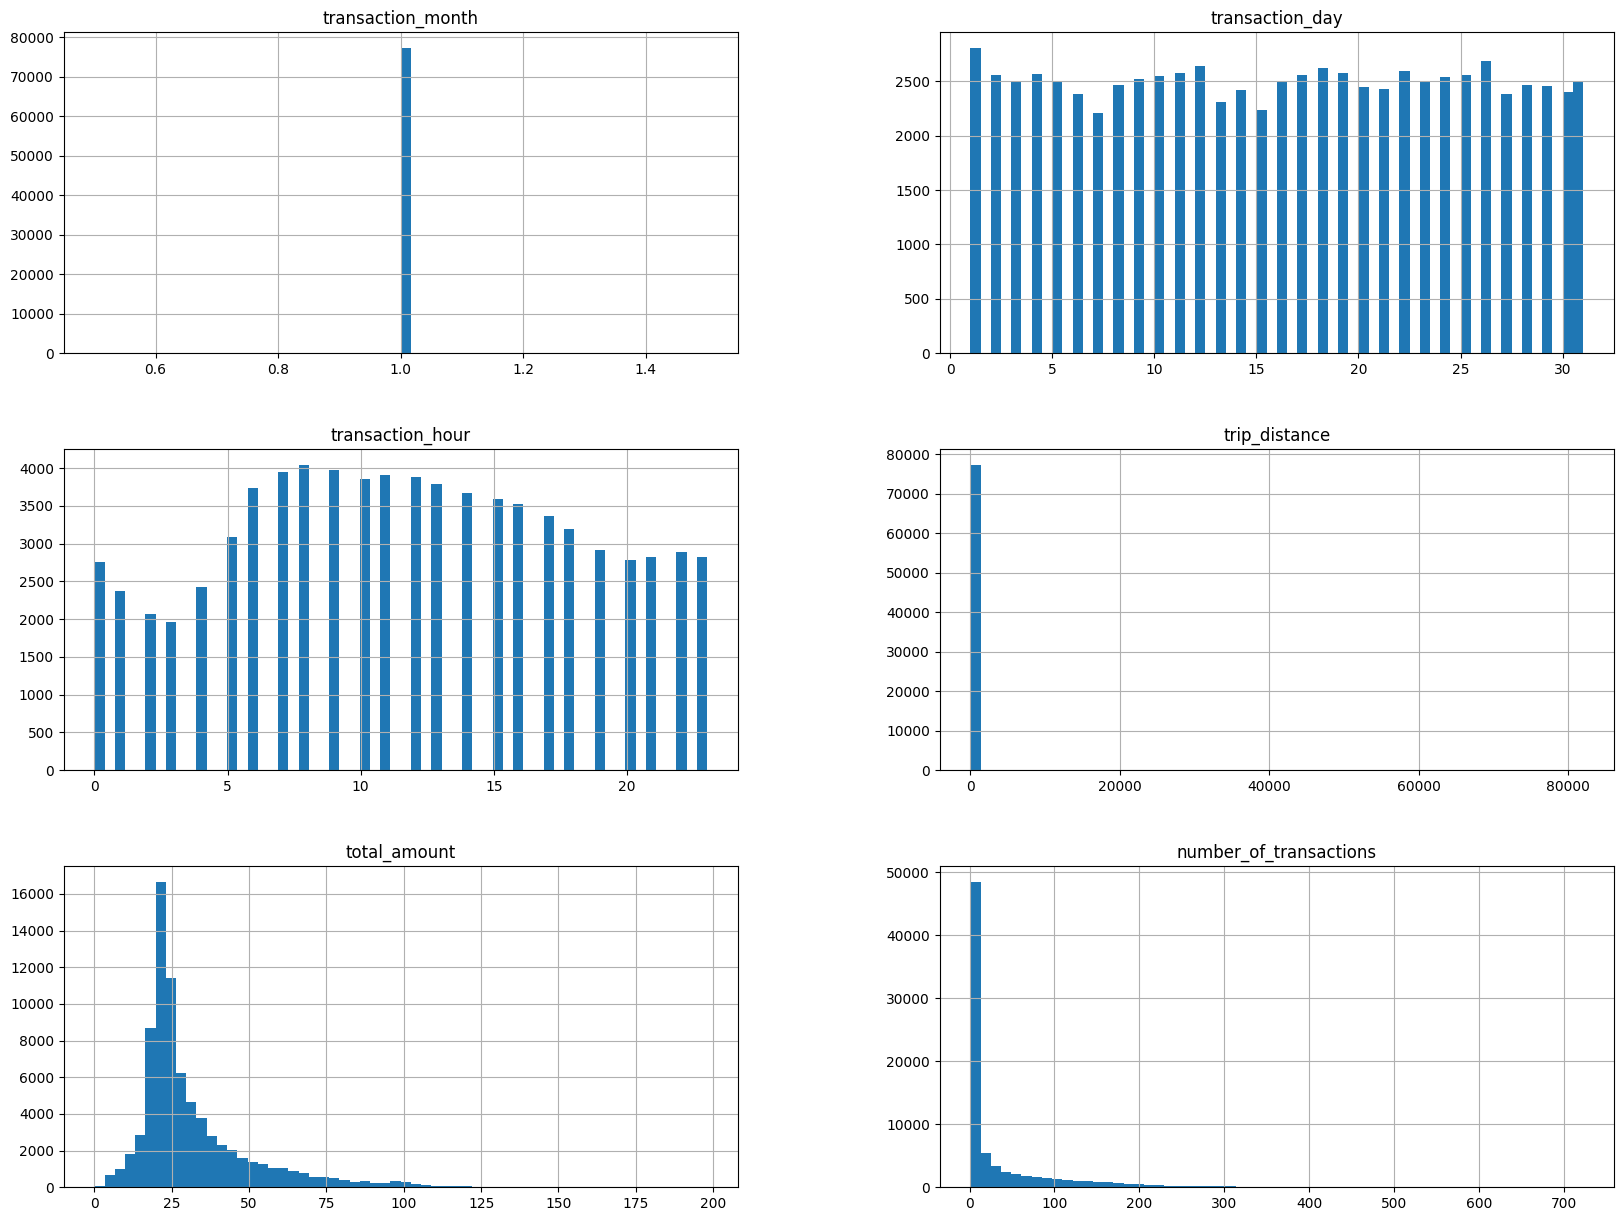

In [43]:
df_grouped_by_region.hist(figsize=(20,15), bins=60)

In [46]:
#i want to check the highest amount of trip_distance
df_grouped_by_region['trip_distance'].max()

np.float64(82015.45)

## 5. Benchmark Model <a id = section5></a>
[Back to top](#table-of-contents)

Things to lookup and understand in this 
- decide input and target features
- 

In [48]:
baseline_model_data = df_grouped_by_region.copy()

In [53]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

#### 5.1 Train-Test Split

In [51]:
#pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 8.8 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import train_test_split

x_bench = baseline_model_data[input_features_benchmark]
y_bench = baseline_model_data[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

#### 5.2 Fit a model to the data <a id=section5.2> </a>
[back to top](#table-of-contents)

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10) #max_depth is a hyperparameter that sets the maximum depth of the tree
tree.fit(x_train_bench, y_train_bench)

DecisionTreeRegressor(max_depth=10)

#### 5.3 Model Evaluation <a id=section5.3> </a>
[back to top](#table-of-contents)

In [57]:
model_at_hand = tree

y_pred_bench = model_at_hand.predict(x_test_bench)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print ('mean_absolute_error:', mean_absolute_error(y_test_bench, y_pred_bench))
print ('mean_squared_error:', mean_squared_error(y_test_bench, y_pred_bench))
print ('root_mean_squared_error:', sqrt(mean_squared_error(y_test_bench, y_pred_bench)))
print ('r2_score:', r2_score(y_test_bench, y_pred_bench))


mean_absolute_error: 6.409597782700361
mean_squared_error: 154.35333416800256
root_mean_squared_error: 12.423901728845193
r2_score: 0.5854516396206362


<Axes: xlabel='true', ylabel='pred'>

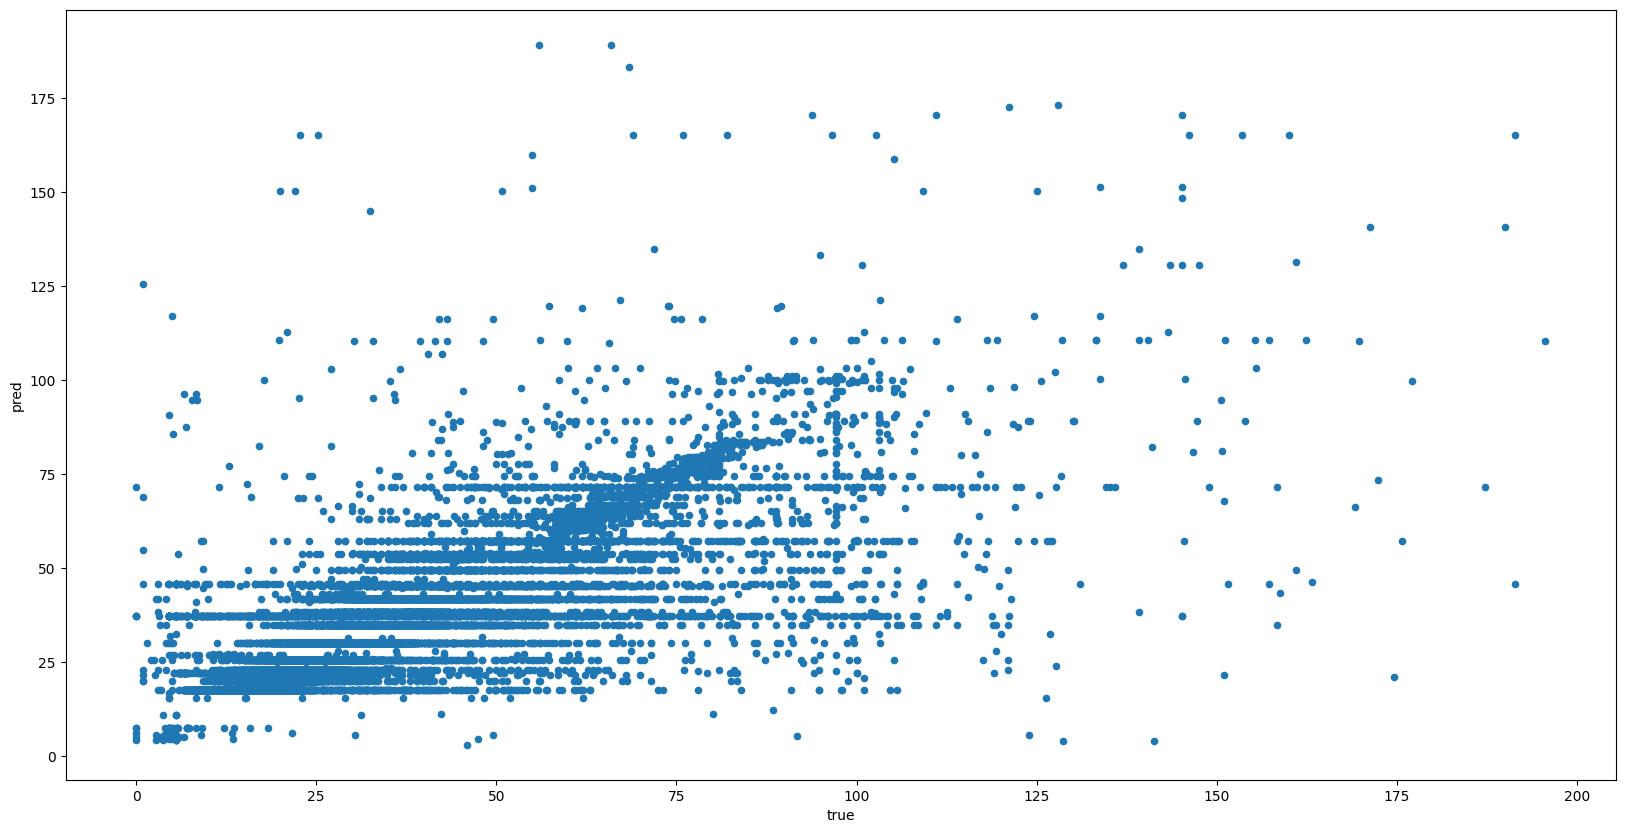

In [58]:
data = {'true': y_test_bench, 'pred': y_pred_bench}
results = pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred', figsize=(20,10))

#### 5.4 Fix Problems <a id=section5.4> </a>
[back to top](#table-of-contents)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_feature_benchmark = 'total_amount'

#train-test split
x_bench = baseline_model_data[input_features_benchmark]
y_bench = baseline_model_data[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

#fit a model
tree = DecisionTreeRegressor(max_depth=10) #max_depth is a hyperparameter that sets the maximum depth of the tree
tree.fit(x_train_bench, y_train_bench)

#Evaluate the model
model_at_hand = tree

y_pred_bench = model_at_hand.predict(x_test_bench)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print ('mean_absolute_error:', mean_absolute_error(y_test_bench, y_pred_bench))
print ('mean_squared_error:', mean_squared_error(y_test_bench, y_pred_bench))
print ('root_mean_squared_error:', sqrt(mean_squared_error(y_test_bench, y_pred_bench)))
print ('r2_score:', r2_score(y_test_bench, y_pred_bench))

mean_absolute_error: 11.438508900310318
mean_squared_error: 283.3849526744078
root_mean_squared_error: 16.834041483684416
r2_score: 0.23891007524661356


<Axes: xlabel='true', ylabel='pred'>

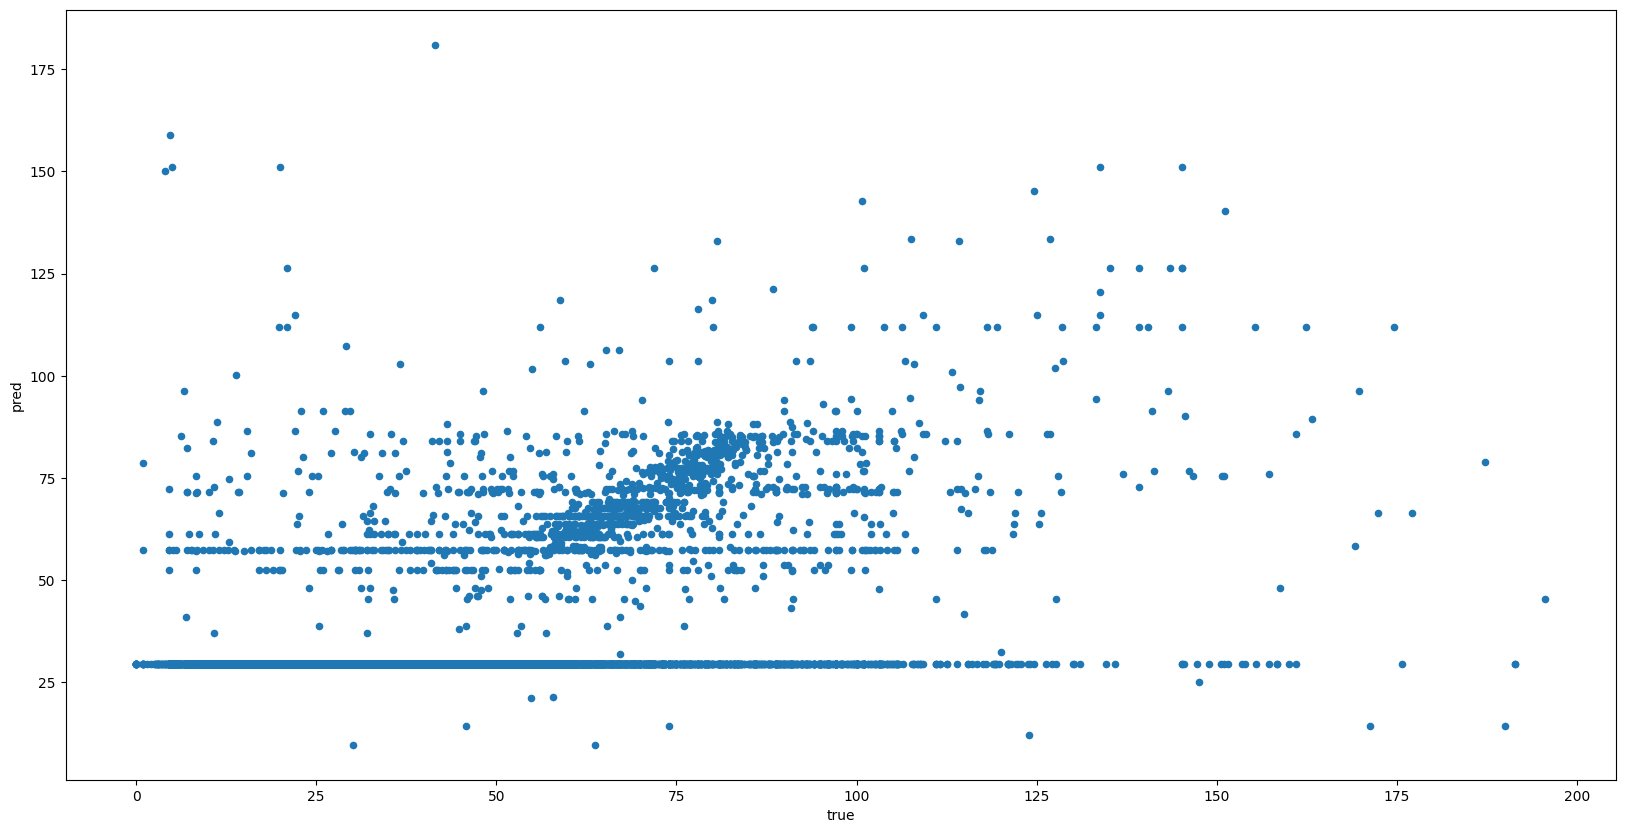

In [61]:
data = {'true': y_test_bench, 'pred': y_pred_bench}
results = pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred', figsize=(20,10))

## 6 Feature Engineering <a id=FeatureEngineering> </a>
[Back to top](#table-of-contents)<br>
what might affect a the earnings of a taxi driver in a specific NYC area at a specific hour of a day?<br>
possible features:
- special events
- weekends
- holidays
- traffic info
- weather

In [62]:
df_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [63]:
df_new_features = df_grouped_by_region.copy()

**Date-related features**

In [65]:
# convert transaction_date to datetime
df_new_features['transaction_date'] = pd.to_datetime(df_new_features['transaction_date'])

# add a new feature called transaction_week_day
df_new_features['transaction_week_day'] = df_new_features['transaction_date'].dt.weekday

# add a boolean feature to determine if its a weekend or weekday
df_new_features['weekend'] = df_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [66]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2024', end='2024').date

df_new_features['is_holidy'] = df_new_features['transaction_date'].isin(holidays)

/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/2887994862.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new_features['is_holidy'] = df_new_features['transaction_date'].isin(holidays)


In [68]:
df_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,is_holidy
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True


**Borough information**

In [70]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype('str')
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [71]:
df_new_features = df_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

df_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,is_holidy,LocationID,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,1,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,1,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,1,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,1,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,1,EWR


In [72]:
df_new_features['Borough'].value_counts()

Borough
Manhattan        42075
Queens           14978
Brooklyn         13558
Bronx             5283
Unknown            722
EWR                181
Staten Island       68
Name: count, dtype: int64

**Weather Related Features**

In [73]:
nyc_weather = pd.read_csv('nyc_weather.csv')

nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [75]:
nyc_weather.shape

(2936, 6)

In [76]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [77]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [78]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [79]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [81]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/3281803556.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [82]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/4034767346.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/4034767346.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].m

In [83]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [85]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [86]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [88]:
df_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,is_holidy,LocationID,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,1,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,1,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,1,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,1,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,1,EWR


In [90]:
df_with_weather = df_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(df_with_weather.shape)
df_with_weather.head()

(77432, 22)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,...,EWR,2019-01-01 13:00:00,12.2,51.0,9.0,0.7,0.446667,13.0,1.0,1.0
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_with_weather = df_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [92]:
df_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,is_holidy,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,1,EWR,12.2,51.0,9.0,0.7,0.446667
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN


In [93]:
df_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
number_of_transactions         0
transaction_week_day           0
weekend                        0
is_holidy                      0
LocationID                     0
Borough                      567
temperature                49742
humidity                   49742
wind speed                 49742
cloud cover                49742
amount of precipitation    49742
dtype: int64

In [94]:
df_with_weather = df_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)


In [95]:
df_with_weather = df_with_weather.interpolate()
df_with_weather = df_with_weather.fillna(method='bfill')
df_with_weather.isna().sum()

/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/2043422321.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_with_weather = df_with_weather.interpolate()
/var/folders/9k/b5rnfrc12mzcjkxxfjx33cdr0000gn/T/ipykernel_7992/2043422321.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_with_weather = df_with_weather.fillna(method='bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
number_of_transactions     0
transaction_week_day       0
weekend                    0
is_holidy                  0
LocationID                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [96]:
df_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,number_of_transactions,transaction_week_day,weekend,is_holidy,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2024-01-01,1,1,0,4.810000,40.748333,6,0,False,True,10,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2024-01-01,1,1,0,1.611111,24.853333,9,0,False,True,100,Manhattan,8.3,97.0,0.0,1.0,29.0
2,101,2024-01-01,1,1,0,11.320000,51.580000,1,0,False,True,101,Queens,8.3,97.0,0.0,1.0,29.0
3,102,2024-01-01,1,1,0,5.150000,23.270000,1,0,False,True,102,Queens,8.3,97.0,0.0,1.0,29.0
4,107,2024-01-01,1,1,0,1.988056,22.900556,180,0,False,True,107,Manhattan,8.3,97.0,0.0,1.0,29.0


## 7. Model training <a id=modelTraining> </a>
[back to top](#table-of-contents)

In [ ]:
#in progress....